In [7]:
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

In [2]:
!wget https://www.dropbox.com/s/x3439a7dusvvhd3/out.edit-huwikisource?dl=0 out.edit-huwikisource

--2023-01-08 13:49:45--  https://www.dropbox.com/s/x3439a7dusvvhd3/out.edit-huwikisource?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/x3439a7dusvvhd3/out.edit-huwikisource [following]
--2023-01-08 13:49:45--  https://www.dropbox.com/s/raw/x3439a7dusvvhd3/out.edit-huwikisource
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0d3a031fae2af349974e014c46.dl.dropboxusercontent.com/cd/0/inline/B0KrosCSi45hoBOgRadg6Pg8v_2UBXjOs3P5LpU6DKkq6B2hXSFyxKAJlB6Lgg2GUJPHv2F7ajpdcUXsMOKWCdbid43sKhTjo6X7lV_nIgWB2pYmiibk3-1iEX-se5Ag_LRxrLGVkRM64v6EDkBpbxkoUKAQ6r7UkHox-caX2QNwEQ/file# [following]
--2023-01-08 13:49:46--  https://uc0d3a031fae2af349974e014c46.dl.dropboxusercontent.com/cd/0/inline/B0KrosCSi45hoBOgRadg6Pg8v_2UBXjOs3P5LpU6DKkq6B2h

In [3]:
with open('/content/out.edit-huwikisource?dl=0') as f:
    f = f.read()

In [4]:
print(f[:100])

% bip positive
1	1	1	1149411943
2	1	1	1149565895
2	1	1	1149566104
3	1	1	1149689298
4	2	1	1149360374



In [5]:
s = f.split('\n')

In [6]:
s[0]

'% bip positive'

In [7]:
s[1]

'1\t1\t1\t1149411943'

In [9]:
s[-2]

'331\t35748\t1\t1500526365'

In [9]:
two_collumns = []
for i in tqdm(s[1:-1]):
    a = i.split()
    #print(a)
    two_collumns.append(tuple(sorted((int(a[0]), int(a[1])))))

100%|██████████| 82236/82236 [00:00<00:00, 605187.15it/s]


In [10]:
s[-2]

'331\t35748\t1\t1500526365'

In [11]:
len(two_collumns)

82236

In [12]:
two_collumns[-1]

(331, 35748)

In [13]:
unique = set(two_collumns)

In [14]:
len(unique)

54607

In [ ]:
two_collumns

In [16]:
data = sorted(unique)

In [ ]:
data

# START


graph

In [17]:
D = nx.DiGraph()
D.add_edges_from(data)

In [18]:
len(D.nodes)

35588

In [19]:
len(D.edges)

54607

## Distances

### 2/ Calculez la distribution de l’excentricite d’un sommet.

L'excentricité d'un sommet dans un graphe est la distance maximale entre ce sommet et tous les autres sommets du graphe. Voici un code qui montre comment calculer la distribution de l'excentricité de tous les sommets d'un graphe en utilisant NetworkX:

In [23]:
# Calculez l'excentricité de chaque sommet
eccentricities = nx.eccentricity(N)

# Calculez la distribution de l'excentricité
eccentricity_counts = {}
for node, eccentricity in eccentricities.items():
    if eccentricity not in eccentricity_counts:
        eccentricity_counts[eccentricity] = 0
    eccentricity_counts[eccentricity] += 1

In [24]:
# Affichez la distribution de l'excentricité
print(eccentricity_counts)

{4: 558, 3: 1, 5: 34370, 6: 657}


Ce code calcule l'excentricité de chaque sommet en utilisant la fonction eccentricity de NetworkX. Ensuite, il calcule la distribution de l'excentricité en parcourant les valeurs d'excentricité et en comptant le nombre de fois que chaque valeur d'excentricité apparaît. Enfin, il affiche la distribution de l'excentricité sous forme de dictionnaire Python.

### 3/ Quelle est l’excentricite minimum d’un sommet, combien de sommets realisent ce minimum

L'excentricité minimale d'un sommet dans un graphe est égale à 1 si le sommet est isolé, c'est-à-dire qu'il n'a aucun voisin. Si le graphe contient au moins un arc, alors l'excentricité minimale d'un sommet est égale à 2.

Il y a autant de sommets qui réalisent cette excentricité minimale que de sommets isolés dans le graphe (c'est-à-dire avec une excentricité de 1) ou de sommets adjacents à un sommet isolé (c'est-à-dire avec une excentricité de 2).

In [25]:
# Trouvez le nombre de sommets qui ont une excentricité minimale (1 ou 2)
min_eccentricity = min(eccentricities.values())
num_min_eccentricity = sum(1 for e in eccentricities.values() if e == min_eccentricity)

print(f"Le nombre de sommets qui ont une excentricité minimale est: {num_min_eccentricity}")

Le nombre de sommets qui ont une excentricité minimale est: 1


Ce code calcule l'excentricité de chaque sommet en utilisant la fonction eccentricity de NetworkX. Ensuite, il trouve le nombre de sommets qui ont une excentricité minimale en parcourant les valeurs d'excentricité et en comptant le nombre de sommets qui ont une excentricité de 1 ou de 2. Enfin, il affiche le nombre de sommets qui ont une excentricité minimale.

# Centralites

#### 6/ Calculez au moins deux notions de centralite des noeuds et etudiez les correlations entre leurs scores.

Il existe de nombreuses mesures de centralité des nœuds dans un graphe. Voici deux exemples de notions de centralité des nœuds que vous pouvez utiliser pour étudier les correlations entre leurs scores en utilisant Python et la bibliothèque NetworkX:


La centralité de degré: La centralité de degré d'un nœud est égale au nombre de sommets auxquels il est connecté. Cette mesure de centralité est utile pour mesurer l'importance d'un nœud dans un graphe en termes de nombre de connexions qu'il a.


La centralité de proximité: La centralité de proximité d'un nœud est égale à la somme des distances de tous les autres nœuds au nœud considéré. Cette mesure de centralité est utile pour mesurer l'importance d'un nœud dans un graphe en termes de proximité des autres nœuds.

In [21]:
# Calculez la centralité de degré de chaque nœud
degree_centrality = nx.degree_centrality(N)

In [22]:

# Calculez la centralité de proximité de chaque nœud
closeness_centrality = nx.closeness_centrality(N)

In [26]:
# Calculez la centralité de betweenness pour chaque nœud
betweenness_centrality = nx.betweenness_centrality(N)

#### 7/ Etudiez les correlations des classements qu’elles donnent sur les noeuds

Ce code trace un nuage de points représentant la centralité de degré en abscisse et la centralité de proximité en ordonnée pour chaque nœud en utilisant la fonction scatter de Matplotlib. Cela vous permet de visualiser la correlation

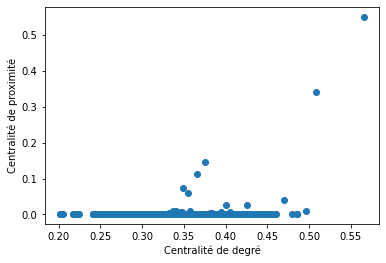

In [31]:
# Tracez un nuage de points représentant la centralité de degré en abscisse et la centralité de proximité en ordonnée pour chaque nœud
plt.scatter(closeness_centrality.values(), degree_centrality.values())
plt.xlabel("Centralité de degré")
plt.ylabel("Centralité de proximité")
plt.show()

In [27]:
# Créer un dataframe à partir des résultats
df = pd.DataFrame({'degree_centrality': degree_centrality,
                   'betweenness_centrality': betweenness_centrality,
                   'closeness_centrality': closeness_centrality
                  })

# Afficher la correlation entre les colonnes
print(df.corr())

                        degree_centrality  betweenness_centrality  \
degree_centrality                1.000000                0.977830   
betweenness_centrality           0.977830                1.000000   
closeness_centrality             0.036949                0.036745   

                        closeness_centrality  
degree_centrality                   0.036949  
betweenness_centrality              0.036745  
closeness_centrality                1.000000  


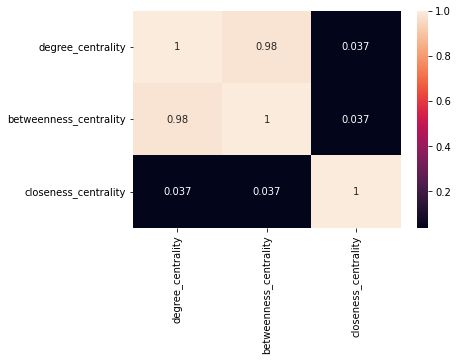

In [28]:
sns.heatmap(df.corr(), annot=True)

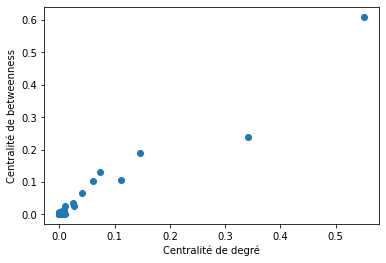

In [29]:
plt.scatter(degree_centrality.values(), betweenness_centrality.values())
plt.xlabel("Centralité de degré")
plt.ylabel("Centralité de betweenness")
plt.show()

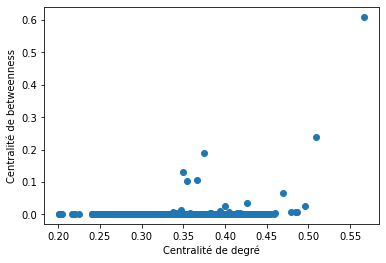

In [33]:
plt.scatter(closeness_centrality.values(), betweenness_centrality.values())
plt.xlabel("Centralité de degré")
plt.ylabel("Centralité de betweenness")
plt.show()